In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from math import log, exp
from scipy.stats import binom
import operator as oper
from functools import reduce

v = np.cumsum(np.log(np.arange(1, 10000000)))

def Log_Factorial(n):
    return v[n]

def Log_nCr(n,r):
    A = Log_Factorial(n)
    B = Log_Factorial(r)
    C = Log_Factorial(n-r)
    return (A-B-C)

def Return_P_Missing_m_Clusters(N, n, k, m):
    km = k*m
    Dr = Log_nCr(N, n)
    S = np.exp(Log_nCr(N-km, n) - Dr)
    for i in range(1, m+1):
        Nr = Log_nCr(N-km, n-i)
        prod = np.exp(np.log(k)+Log_nCr(m, i)+(Nr-Dr))
        S += prod
    return S

rcParams = {'font.size': 45 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)

data_path = '/Users/harihara/Research-Activities/Data/SCRAPT/Simulations/'
d_Uniform = pickle.load(open(data_path+'Uniform_Distribution.pkl', 'rb'))
d_Normal = pickle.load(open(data_path+'Normal_Distribution.pkl', 'rb'))
d_Geometric = pickle.load(open(data_path+'Geometric_Distribution.pkl', 'rb'))

f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))

out_path = '/Users/harihara/Research-Activities/Plots/Iterative_Clustering/ISMB_Figures/'

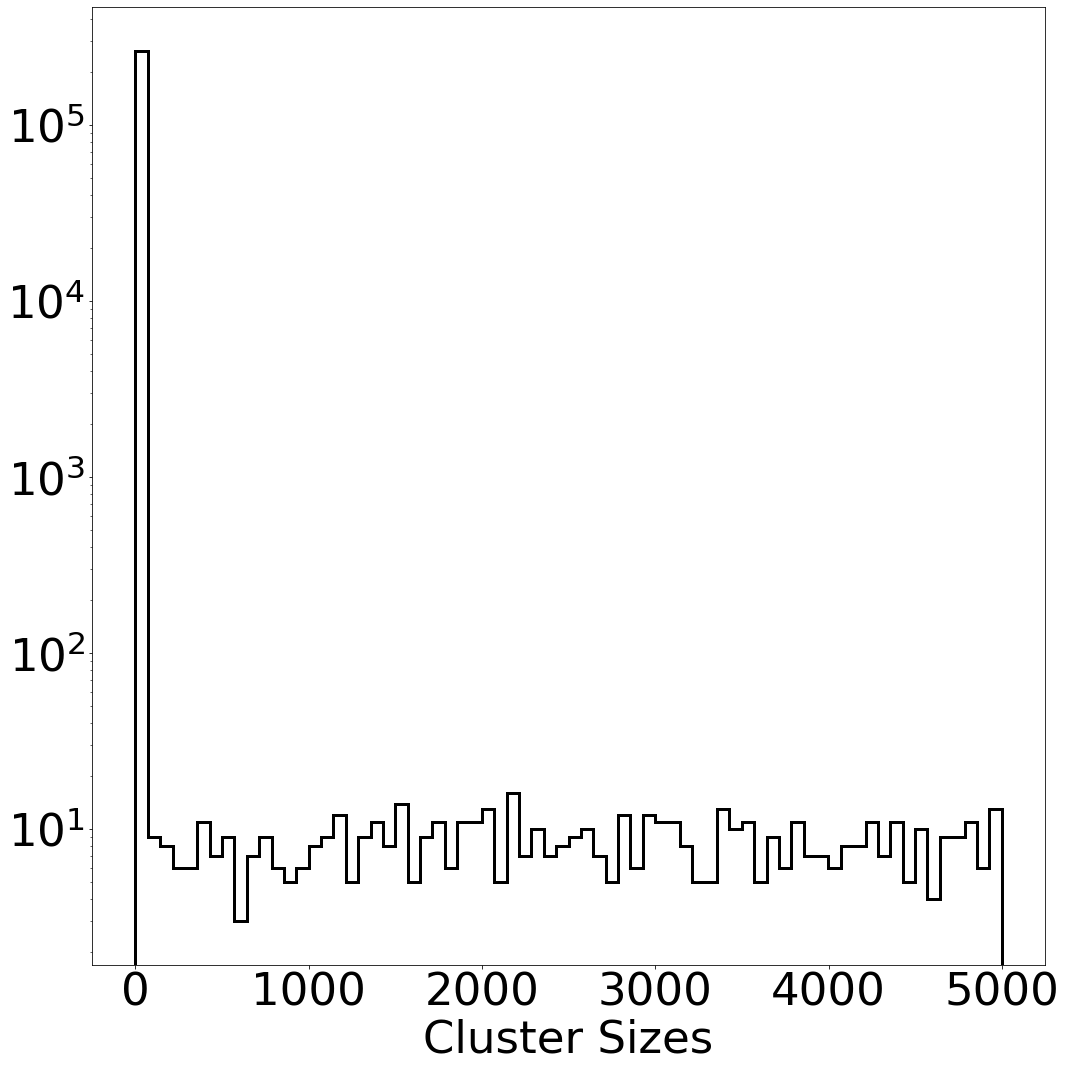

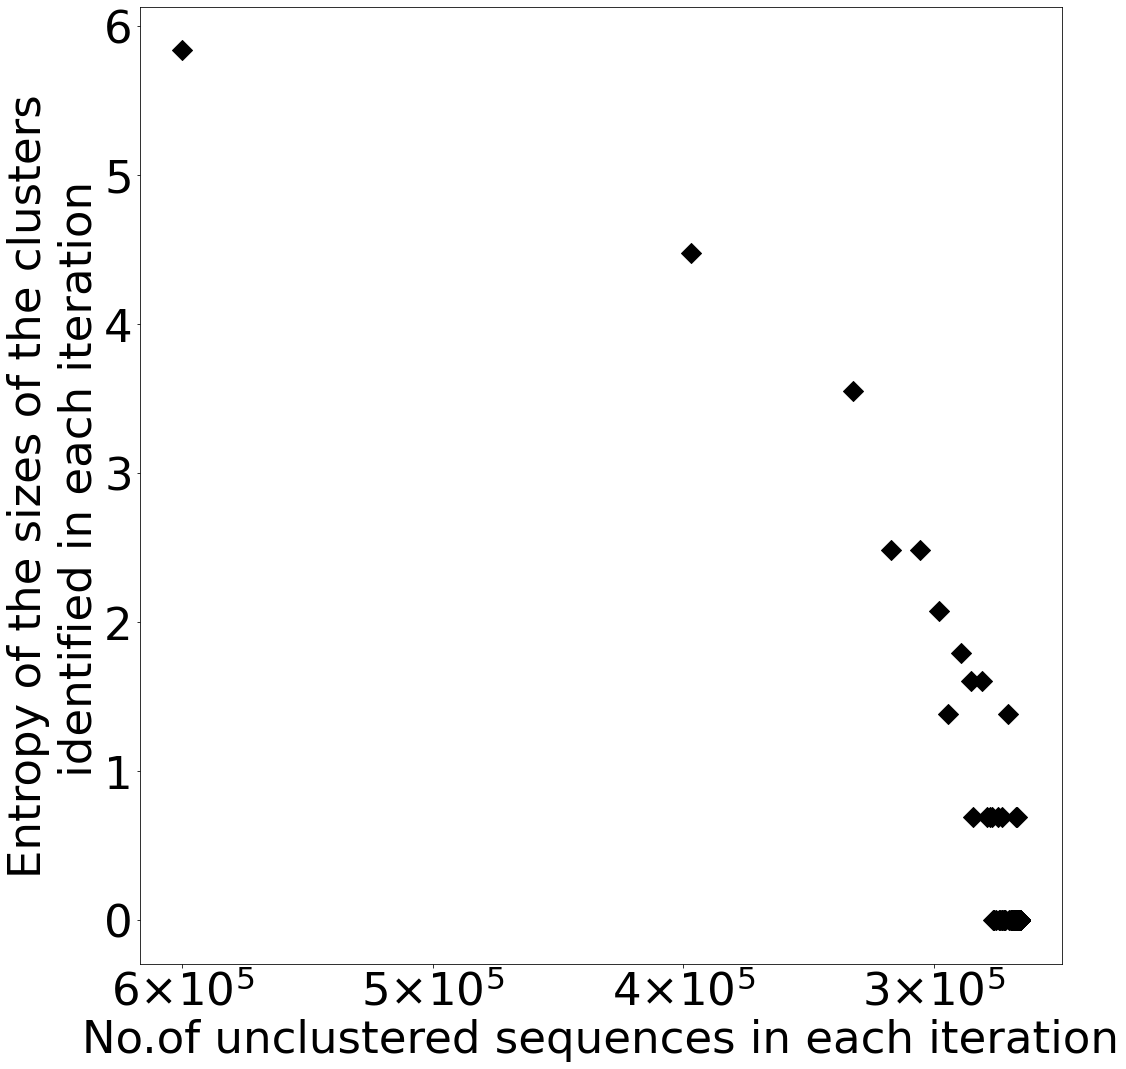

In [2]:
plt.rcParams.update(rcParams)

fig1,ax1 = plt.subplots(1,1,figsize = (16,16))
bins = ax1.hist(d_Uniform['Clusters'], bins = 70, density = False, histtype = 'step', linewidth = 3, 
                color = 'black')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster Sizes')
fig1.tight_layout()
fig1.savefig(out_path+'Simulation_Uniform_Cluster_Distribution.pdf')

fig2,ax2 = plt.subplots(1,1,figsize = (16,16))
d_Uniform['Naive_Sampling_Simulation'].plot.scatter('Num_Seqs_Unclustered','Entropy_Clustered', ax = ax2, 
                                                    s = 200, marker = 'D', color = 'black')
ax2.xaxis.set_major_formatter(mtick.FuncFormatter(g))
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_xlabel('No.of unclustered sequences in each iteration')
ax2.set_ylabel('Entropy of the sizes of the clusters\n identified in each iteration')
fig2.tight_layout()
fig2.savefig(out_path+'Simulation_Uniform_Cluster_Entropy.pdf')


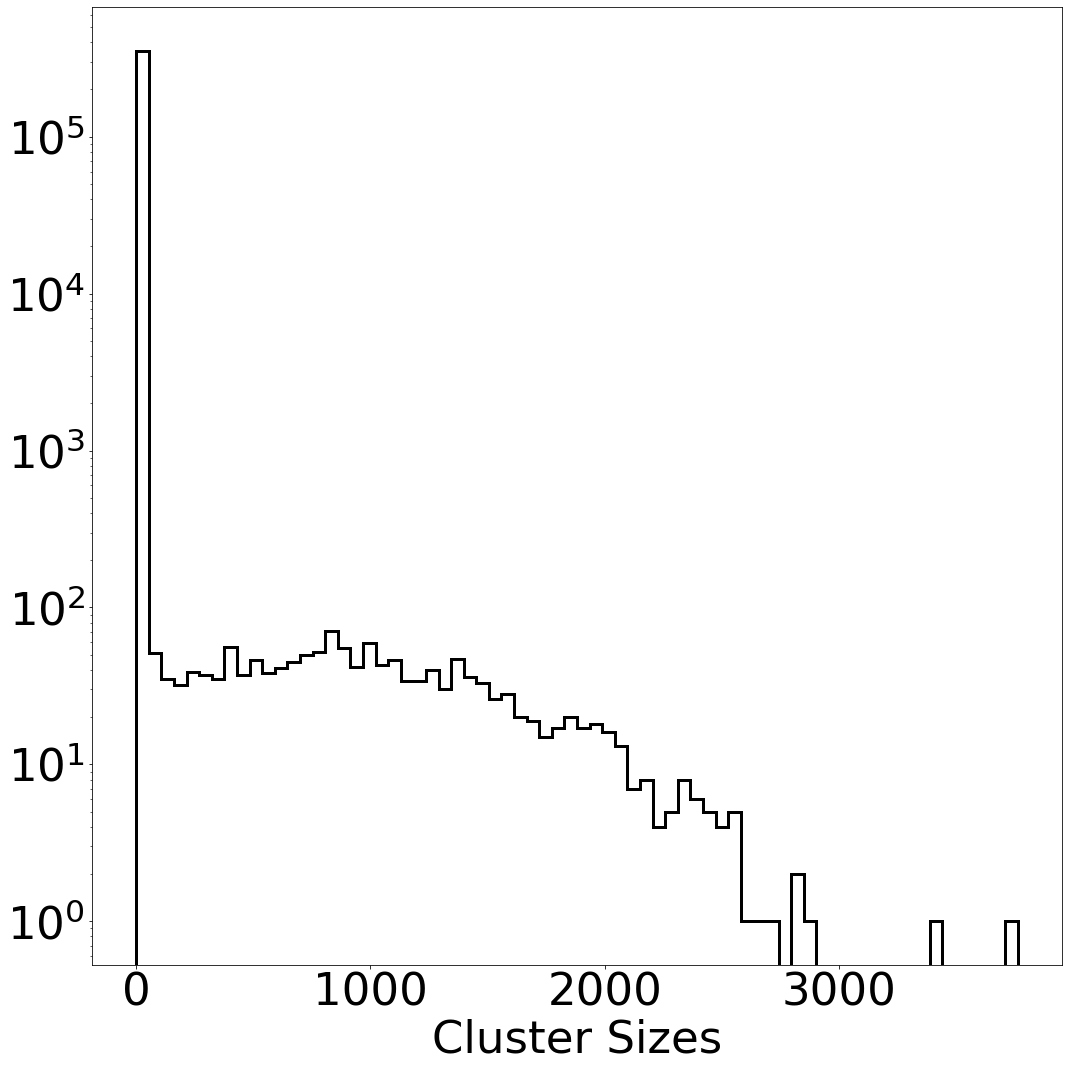

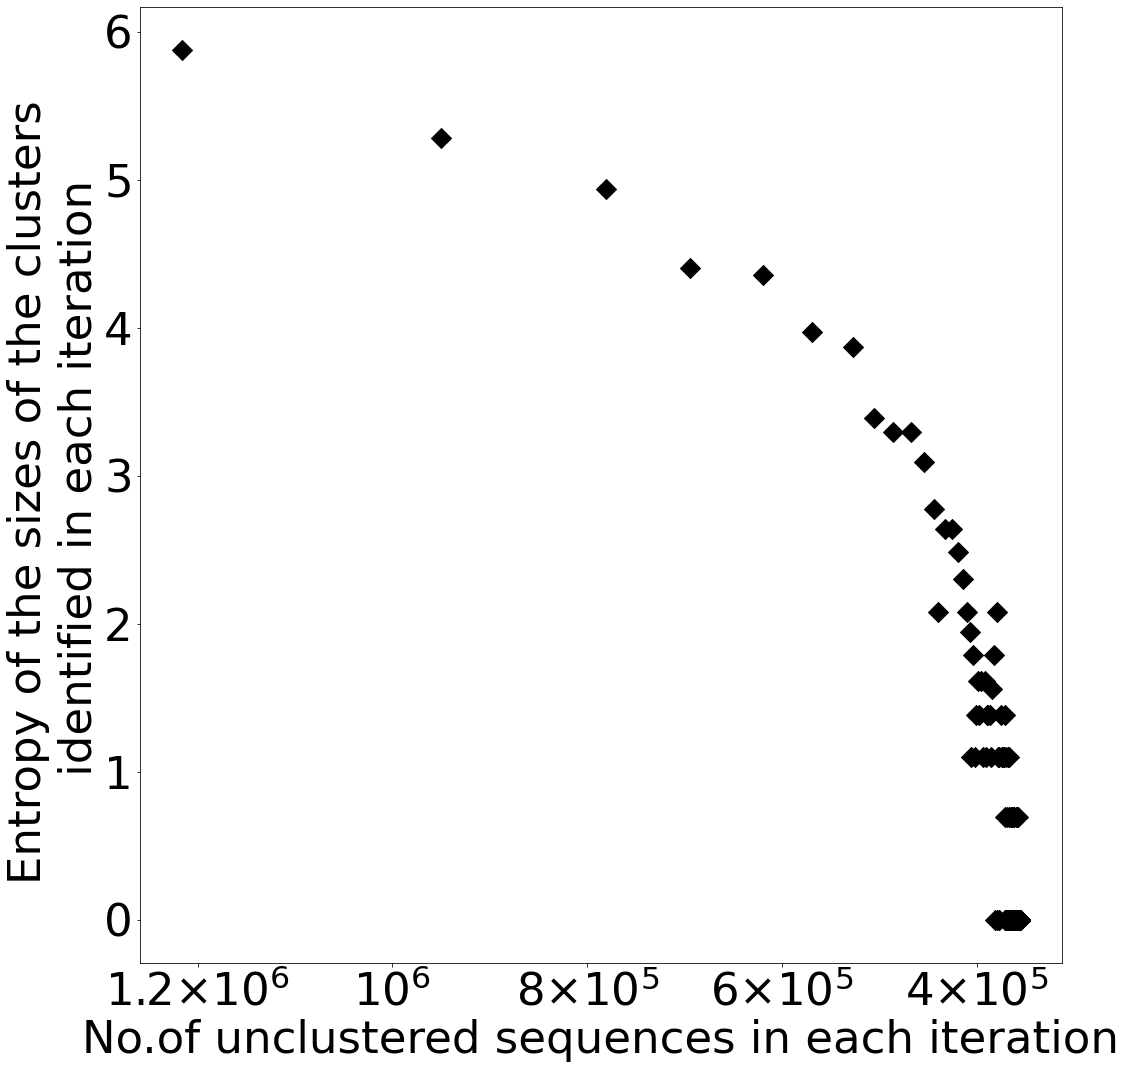

In [3]:
fig1,ax1 = plt.subplots(1,1,figsize = (16,16))
ax1.set_yscale('log')
ax1.set_xlabel('Cluster Sizes')
bins = ax1.hist(d_Normal['Clusters'], bins = 70, density = False, histtype = 'step', linewidth = 3, 
                color = 'black')
fig1.tight_layout()
fig1.savefig(out_path+'Simulation_Normal_Cluster_Distribution.pdf')

fig2,ax2 = plt.subplots(1,1,figsize = (16,16))
d_Normal['Naive_Sampling_Simulation'].plot.scatter('Num_Seqs_Unclustered','Entropy_Clustered', ax = ax2, 
                                                   s = 200, marker = 'D', color = 'black')
ax2.xaxis.set_major_formatter(mtick.FuncFormatter(g))
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_xlabel('No.of unclustered sequences in each iteration')
ax2.set_ylabel('Entropy of the sizes of the clusters \n identified in each iteration')
fig2.tight_layout()
fig2.savefig(out_path+'Simulation_Normal_Cluster_Entropy.pdf')


/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


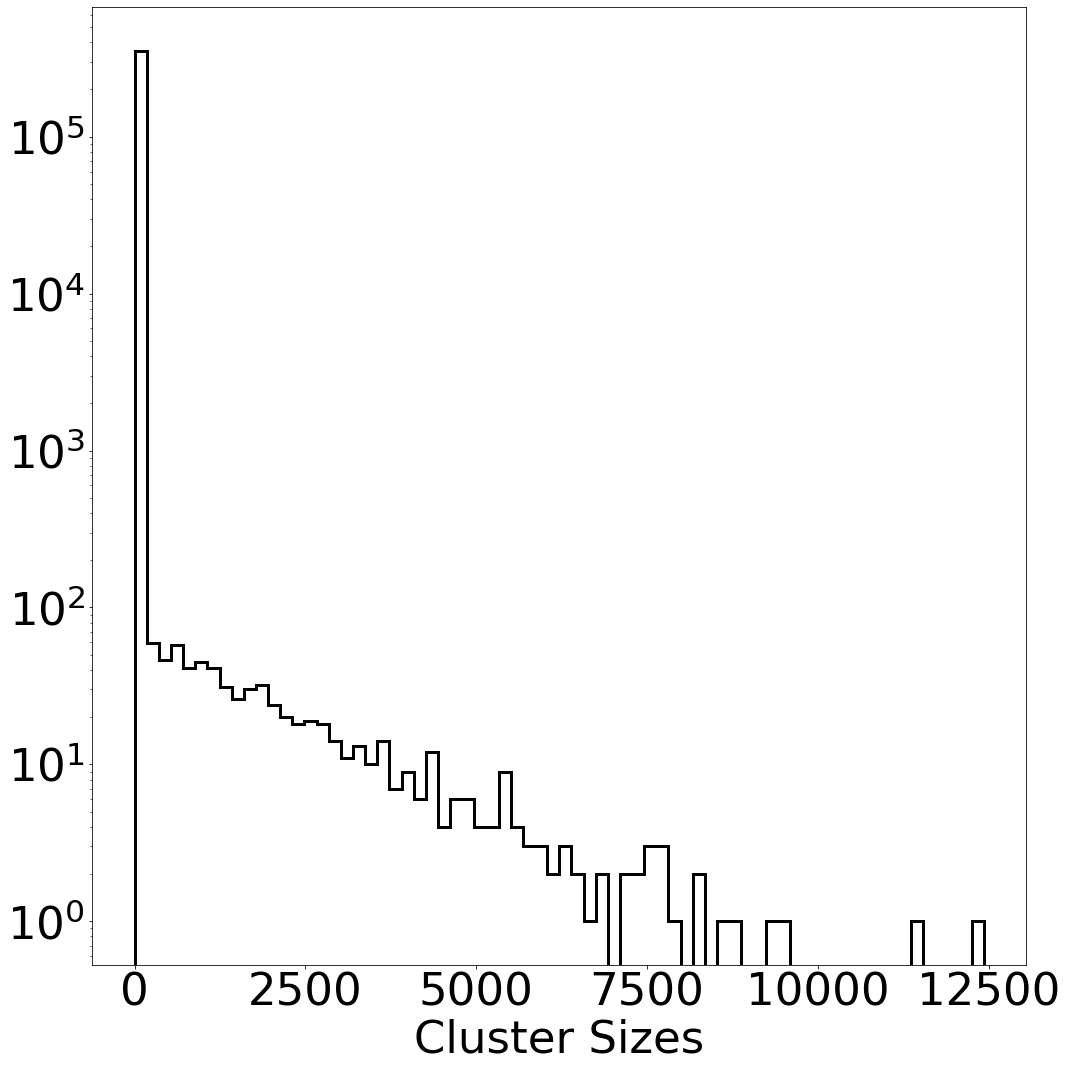

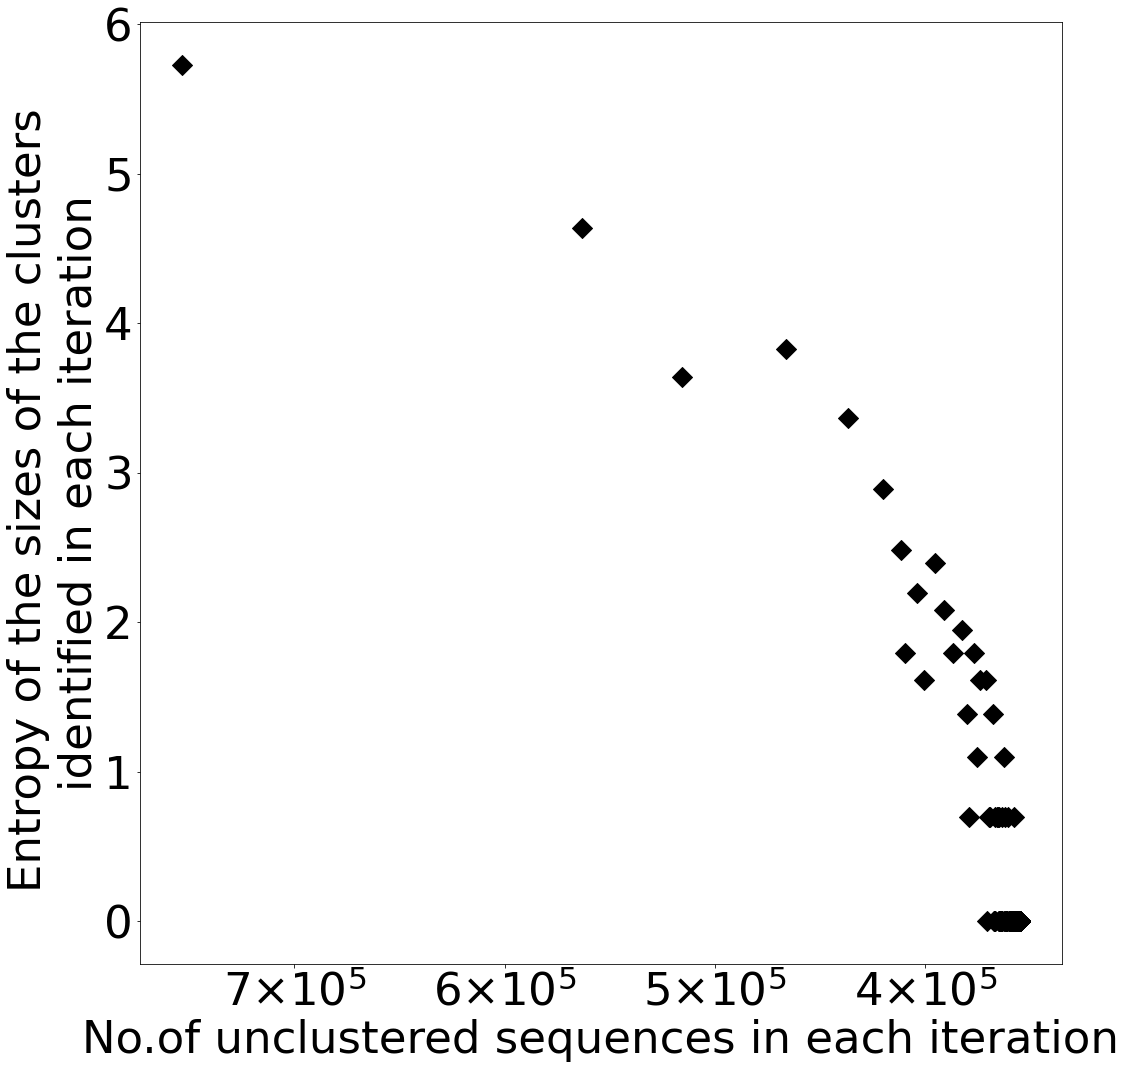

In [4]:
fig1,ax1 = plt.subplots(1,1,figsize = (16,16))
ax1.set_yscale('log')
ax1.set_xlabel('Cluster Sizes')
bins = ax1.hist(d_Geometric['Clusters'], bins = 70, density = False, histtype = 'step', linewidth = 3,
               color = 'black')
fig1.tight_layout()
fig1.savefig(out_path+'Simulation_Geometric_Cluster_Distribution.pdf')

fig2,ax2 = plt.subplots(1,1,figsize = (16,16))
d_Geometric['Naive_Sampling_Simulation'].plot.scatter('Num_Seqs_Unclustered','Entropy_Clustered', ax = ax2, 
                                                      s = 200, marker = 'D', color = 'black')

ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_xticklabels(ax2.get_xticks())
ax2.xaxis.set_major_formatter(mtick.FuncFormatter(g))
ax2.set_xlabel('No.of unclustered sequences in each iteration')
ax2.set_ylabel('Entropy of the sizes of the clusters \nidentified in each iteration')
fig2.tight_layout()
fig2.savefig(out_path+'Simulation_Geometric_Cluster_Entropy.pdf')


In [5]:
N = 1500000
alpha = [0.1,0.5,1.0,5.0,10.0]
df = pd.DataFrame()
for i in range(len(alpha)):
    actual, approximate = [], []
    s = int(alpha[i]*N/100.0)
    m = []
    for k in list(range(50,1000,1))+list(range(1000, 50000, 500)):
        approximate.append(Return_P_Missing_m_Clusters(N, k, s, 1))
    df[str(s)+'_Approximate'] = approximate
df['Cluster_Size'] = np.array(list(range(50,1000,1))+list(range(1000, 50000, 500)))/N*100.0


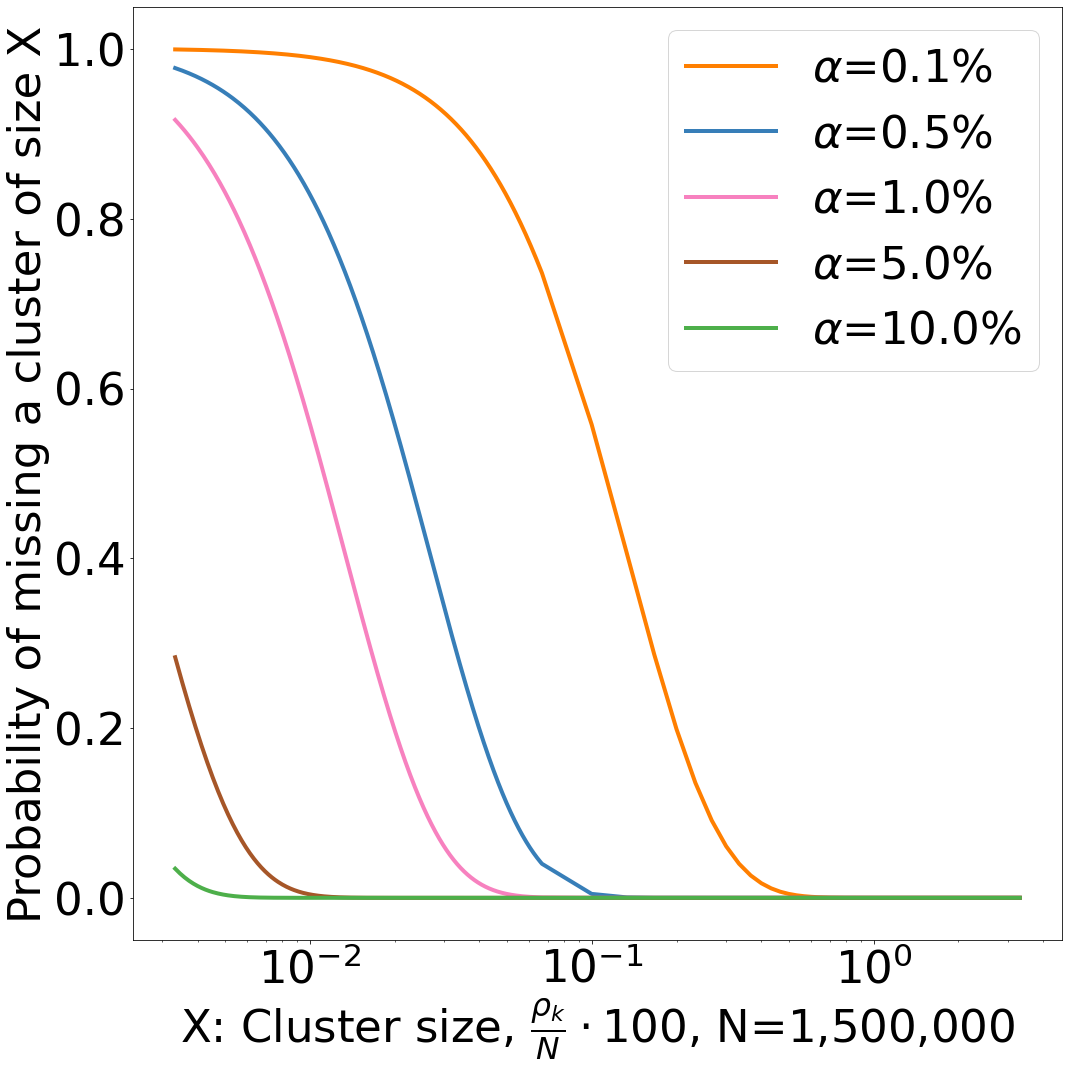

In [6]:
fig, ax = plt.subplots(1,1,figsize = (16,16))
colors = ['#ff7f00','#377eb8','#f781bf', '#a65628', '#4daf4a']
for i in range(len(alpha)):
    s = int(alpha[i]*N/100.0)
    df.plot('Cluster_Size', str(s)+'_Approximate', linewidth=4, color = colors[i], 
            ax = ax,label = r'$\alpha$='+str(alpha[i])+'%')
ax.legend(ncol = 1)
ax.set_xlabel(r'X: Cluster size, $\frac{\rho_k}{N}\cdot 100$, N=1,500,000')
ax.set_ylabel('Probability of missing a cluster of size X')
ax.set_xscale('log')
fig.tight_layout()

fig.savefig(out_path+'Lemma-1.pdf')

In [7]:
N = 1500000
alpha = 0.1
m = np.arange(1, 1000, 1)

df = pd.DataFrame()

s = int(alpha*N/100.0)
for k in [100, 250, 500, 750, 1000, 5000, 40000]:
    approximate = []
    print(N/k)
    for j in m:
        if j*k >= 0.3*N:
            b = np.nan
        else:
            b = Return_P_Missing_m_Clusters(N, s, k, j)
        approximate.append(b)
    df[r'$\frac{\rho_1}{N}\cdot 100$='+str(round(k/N*100, 3))] = approximate
df['Num_Clusters'] = m
df = df.set_index('Num_Clusters')

15000.0
6000.0
3000.0
2000.0
1500.0
300.0
37.5


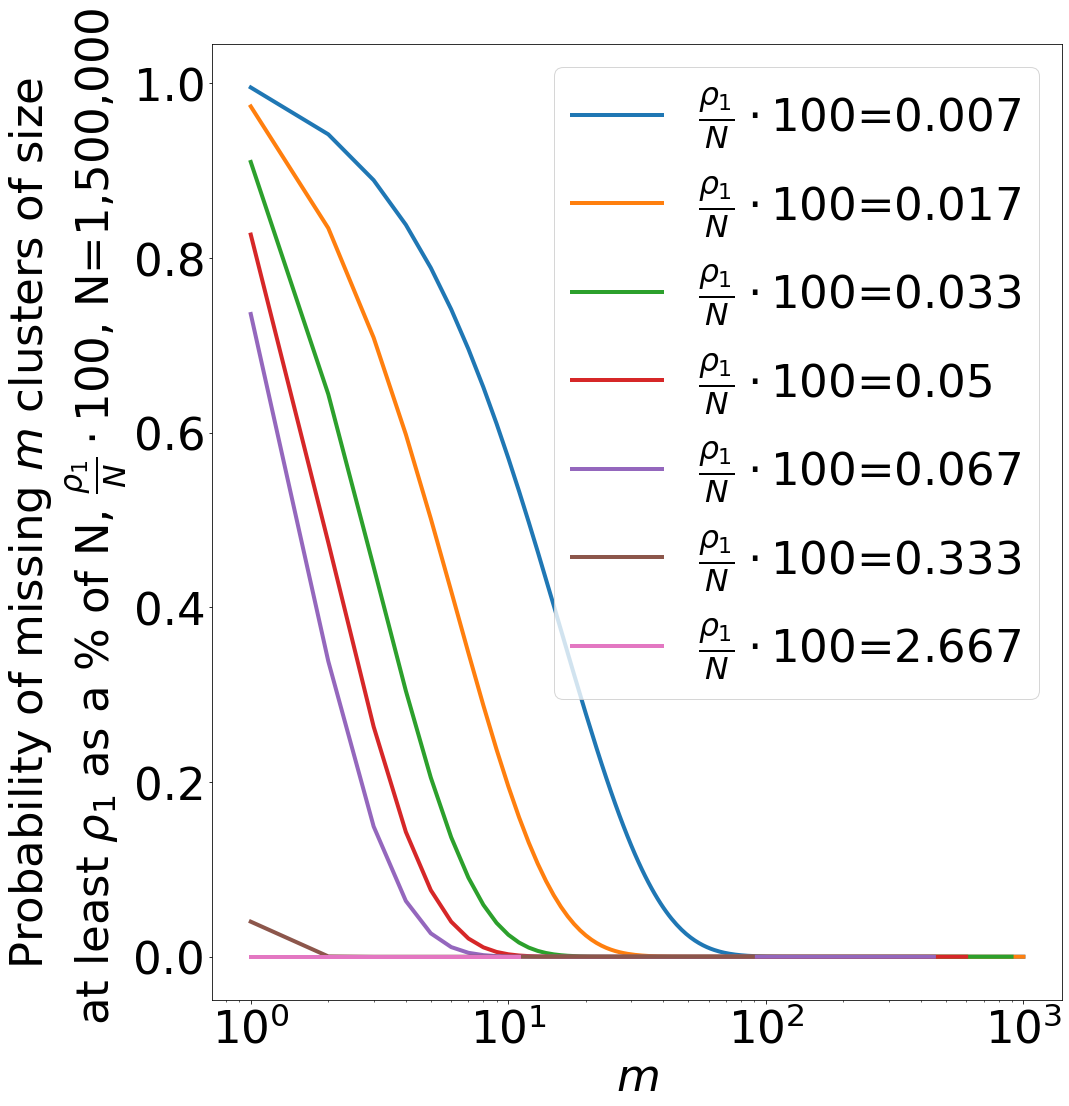

In [8]:
fig, ax = plt.subplots(1,1,figsize=(16,16))
df.plot(ax = ax, linewidth=4)
ax.set_xlabel(r'$m$')
ax.legend(ncol = 1, loc= 1)
ax.set_ylabel('Probability of missing $m$ clusters of size\n at least '+r'$\rho_1$ as a % of N,'+
              r' $\frac{\rho_1}{N}\cdot 100$, N=1,500,000')
ax.set_xscale('log')
fig.tight_layout()
fig.savefig(out_path+'Lemma-2.pdf')